# Аналитика для Яндекс.Афиши

## Описание проекта.
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
 - лог сервера с данными о посещениях сайта Яндекс.Афиши (переменная `visits`), 
 - выгрузка всех заказов за этот период ( переменная `orders`),
 - статистика рекламных расходов ( переменная `costs`).
 
Цель работы :изучение и расчет пользовательских метрик.

Задачи:

**Продукт**
 - Сколько людей пользуются в день, неделю, месяц?
 - Сколько сессий в день?
 - Сколько длится одна сессия?
 - Как часто люди возвращаются? (RR)
 
**Продажи**
 - Когда люди начинают покупать?
 - Сколько раз покупают за период?
 - Какой средний чек?
 
**Маркетинг**
 - Сколько денег потратили? Всего / на каждый источник / по времени
 
**Метрики:**
 - Сколько денег приносят? (LTV)
 - Сколько стоило привлечение одного покупателя из каждого источника?
 - На сколько окупились расходы? (ROI)


## 1. Обзор данных

### Данные, предоставленные для работы


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

### Обзор
Для каждой таблицы 
 - проверим содержимое
 - информацию о типах и количестве записей
 - наличие пропусков
 - наличие полных дубликатов

### Лог посещений

 - `Uid` — уникальный идентификатор пользователя
 - `Device` — категория устройства пользователя
 - `Start Ts` — дата и время начала сессии. ***Требуется замена типа!***
 - `End Ts` — дата и время окончания сессии ***Требуется замена типа!***
 - `Source Id` — идентификатор рекламного источника, из которого пришел пользователь

Полных дубликатов нет.

Пропусков нет.

Требуется замена названий колонок.


In [3]:
#функция для быстрого осмотра данных
def overview(data):
    display(data.head())
    display(data.info())
    print('Пропуски в данных:')
    print(data.isnull().sum())
    print('Полностью дублированных строк:')
    print(data.duplicated().sum())

In [4]:
overview(visits)
    
    

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Пропуски в данных:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Полностью дублированных строк:
0


### Информация о заказах
 - `Uid` — уникальный id пользователя, который сделал заказ
 - `Buy Ts` — дата и время заказа. ***Требуется замена типа!***
 - `Revenue` — выручка Яндекс.Афиши с этого заказа

Полных дубликатов нет.

Пропусков нет.

Требуется замена названий колонок.


In [5]:
overview(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Пропуски в данных:
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
Полностью дублированных строк:
0


### Затраты на маркетинг

 - `source_id` — идентификатор рекламного источника
 - `dt` — дата. ***Требуется замена типа!***
 - `costs` — затраты на этот рекламный источник в этот день

Полных дубликатов нет.

Пропусков нет.


In [6]:
overview(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

Пропуски в данных:
source_id    0
dt           0
costs        0
dtype: int64
Полностью дублированных строк:
0


## 2. Подготовка данных

- Изменение названий столбцов в таблицах

In [7]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
#visits.head()
orders.columns = ['buy_ts', 'revenue','uid']
#orders.head()

 - Изменение типов в таблице для колонок с датой и временем для расчетов.

In [8]:
#функция для перевода в формат датывремени
def to_dt(data, column):
    data[column] = pd.to_datetime(data[column])

In [9]:
to_dt(costs, 'dt')
to_dt(orders, 'buy_ts')
to_dt(visits, 'end_ts')
to_dt(visits, 'start_ts')

#costs.info()
#orders.info()
#visits.info()
#проверка 

 - В данных нет пропусков и полностью дублирующихся строк
 
Данные готовы к работе!

## 3. Отчеты и метрики

### Пользовательская активность.

Мы работаем с сервисом, который продает людям билеты на мероприятия. Что бы купить билет, люди должны ознакомиться с тем, какие мероприятия будут проходить и выбрать себе что то по душе. Важным фактором для такого продукта будет посещаемость.

Количество уникальных пользователей, пользующихся сервисом в среднем:
 - в день: **907**
 - в неделю: **5176**
 - в месяц: **23228**

Пользователи не часто пользуются сервисом (**sticky_factor = 4%**).

Пользовательская сессия:

- В среднем в день пользователи заходят в сервис один раз. В неделю и месяц пользуются сервисом так же один раз. Поэтому и фактор "липкости" такой низкий. 
 - Продолжительность сессии *от 1 до 5 минут*. 
   - На графике распределения продолжительности сессии виден пик сессий ***около нуля.*** Т.е. пользователь открывает сервис и практически сразу закрывает. Такое поведение пользователей может быть вызвано несколькими причинами: 1. Непонятный интерфейс. 2. Пользователь не смог быстро найти нужное мероприятие и потерял интерес (недостаток контента). 3. Пользователь открыл сайт случайно, потому что искал что то с *похожим* названием.
  -  Коэффицент удержания низкий и падает в среднем на 90% во 2 месяц или неделю, для пользователей как месячных, так и недельных когорт. Наибольший отток для участников месячных когорт происходит именно на 2 месяц. 
  

Возможно, пользователи очень редко выбираются на концерты или выставки или у сервиса есть проблемы.

## Характеристика пользовательской активности

 - Часть пользователей закрывают сервис почти сразу, после того как зашли.
 - В среднем пользователи проводят на сайте от одной до пяти минут. 
   - Наиболее долгие сессии совершают пользователи, пришедшие из источников 1,2 и 6. Так же сессии с домашних компьютеров обычно дольше, чем с мобильной версии сервиса.
   - Сессии короче 5 секунд совершают в основном с домашних компьютеров (но их в принципе больше) и больше всего таких пользователей из источника траффика 4 


In [10]:
#display(visits.head())

In [11]:
#Сколько людей пользуются в день, неделю, месяц?
#Выделим год, месяц, номер недели и дня для расчетов.
visits['s_year'] = visits['start_ts'].dt.year
visits['s_month'] = visits['start_ts'].dt.month
visits['s_week'] = visits['start_ts'].dt.week
visits['s_day'] = visits['start_ts'].dt.date

#visits.head()

In [12]:
# среднее количество уникальных пользователей в день, неделю, месяц
mau = visits.groupby(['s_year', 's_month'])['uid'].nunique().mean().round(2)
wau = visits.groupby(['s_year', 's_week'])['uid'].nunique().mean().round(2)
dau = visits.groupby('s_day')['uid'].nunique().mean().round(2)

sticky_factor = dau / mau 

display('MAU', mau, 'WAU', wau, 'DAU', dau, 'Липкий фактор', sticky_factor.round(2))

'MAU'

23228.42

'WAU'

5716.25

'DAU'

907.99

'Липкий фактор'

0.04

In [13]:
#Сколько сессий в день?
#функция для подсчета поличество сессий: делит число сессий за период на количество пользователей за тот же период.

def session_per_user_stat(data, column_1, column_2):
    sess_per_user_stat = data.groupby([column_1, column_2]).agg({'uid':['count', 'nunique']})
    sess_per_user_stat.columns = ['n_sessions', 'n_users']
    sess_per_user_stat['sess_per_user'] = sess_per_user_stat['n_sessions'] / sess_per_user_stat['n_users']
    return sess_per_user_stat['sess_per_user'].mean().round(2)

sessions_daily = session_per_user_stat(visits, 's_year', 's_day')
sessions_weekly = session_per_user_stat(visits, 's_year', 's_week')
sessions_monthly = session_per_user_stat(visits, 's_year', 's_month')

display('Сессий в день:', sessions_daily,'Сессий в неделю:', sessions_weekly,'Сессий в месяц:', sessions_monthly)

'Сессий в день:'

1.08

'Сессий в неделю:'

1.18

'Сессий в месяц:'

1.28

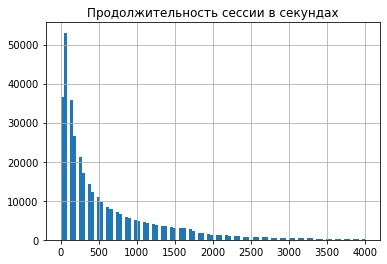

In [14]:
#Сколько длится одна сессия?
# Выделим продолжительность сесси в секундах в отдельную колонку
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

#Распределение имеет вид Пауссоновского 
visits['duration_sec'].hist(bins=100, range=(0, 4000))
plt.title('Продолжительность сессии в секундах')
plt.show()

In [15]:
#(visits['duration_sec'].describe())
#Что бы избежать влияния аномальных значений на среднюю продолжительность сессии оценю несколько показателей
display('Медиана продолжительности сессии', visits['duration_sec'].median(), 
        'Мода (наиболее частая) продолжительности сессии', visits['duration_sec'].mode())

'Медиана продолжительности сессии'

300.0

'Мода (наиболее частая) продолжительности сессии'

0    60
dtype: int64

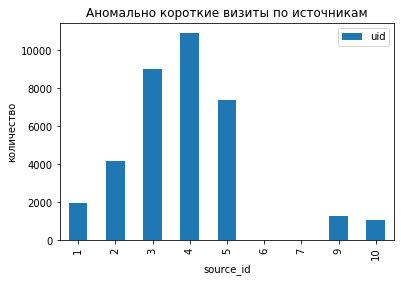

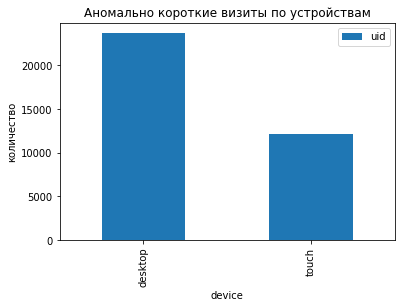

In [16]:
#Так как на графике заметен пик посещений длительностью около нуля секунд, узнаем побольше про них
#Соберем датафрейм из подозрительных визитов
anomal_visits = visits.query('duration_sec < 5')

#Посмотрим количество аномалий из различных источников
anomal_visits.pivot_table(index='source_id', values='uid', aggfunc='count').plot(kind = 'bar')
plt.ylabel('количество')
plt.title('Аномально короткие визиты по источникам')
plt.show()

#и различных устройств
anomal_visits.pivot_table(index='device', values='uid', aggfunc='count').plot(kind = 'bar')
plt.ylabel('количество')
plt.title('Аномально короткие визиты по устройствам')
plt.show()


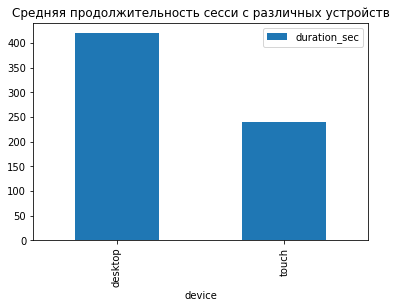

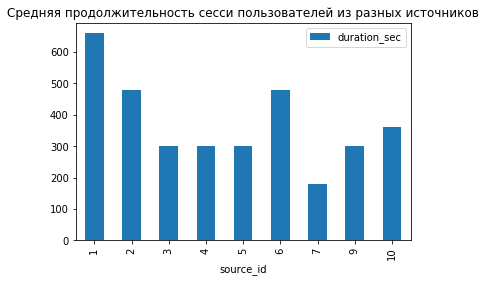

In [17]:
#Оценим продолжительность сессий без учета аномальных
good_visits = visits.query('duration_sec > 5')

#по девайсам
good_visits.pivot_table(index='device', values='duration_sec', aggfunc='median').plot(kind = 'bar')
plt.title('Средняя продолжительность сесси с различных устройств')
plt.show()

#по источникам
good_visits.pivot_table(index='source_id', values='duration_sec', aggfunc='median').plot(kind = 'bar')
plt.title('Средняя продолжительность сесси пользователей из разных источников')
plt.show()

In [18]:
# Для расчета retention создадим месячные когорты
# Дата первой активности пользователя
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit_date'
visits_cohorts = visits.merge(first_visit, on='uid')
#visits_cohorts.head()

In [19]:
visits_cohorts['visit_month'] = visits_cohorts['start_ts'].astype('datetime64[M]')
visits_cohorts['first_visit_month'] = visits_cohorts['first_visit_date'].astype('datetime64[M]')

#Добавим жизненный цикл когорты
visits_cohorts['cohort_lifetime'] = visits_cohorts['visit_month'] - visits_cohorts['first_visit_month']
visits_cohorts['cohort_lifetime'] = visits_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
visits_cohorts['cohort_lifetime'] = visits_cohorts['cohort_lifetime'].round().astype('int')
#visits_cohorts.head()

In [20]:
#когорты пользователей по месяцам
cohorts = visits_cohorts.groupby(
    ['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

#Изначальное количество пользователей в когорте
initial_users = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users = initial_users.rename(columns = {'uid':'initial_users'})
cohorts = cohorts.merge(initial_users,on='first_visit_month')
#cohorts.head()

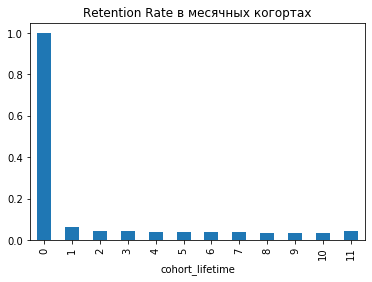

In [21]:
#собственно сам ретеншн для когорты
cohorts['retention'] = cohorts['uid'] / cohorts['initial_users']
retention = cohorts.pivot_table(
    index='first_visit_month', columns='cohort_lifetime', values='retention',aggfunc='sum')

#retention = retention.fillna('')

cohorts.groupby(['cohort_lifetime'])['retention'].mean().plot.bar()
plt.title('Retention Rate в месячных когортах')
plt.show()
#Этот график очень грустный


#тепловая карта в данном случае более выразительно показывает очень грустные данные..я спрятала этот хитмап и внизу сделаю без 1 месяца
#sns.set(style='white')
#plt.figure(figsize=(13, 9))
#plt.title('Retention Rate в месячных когортах')
#sns.heatmap(retention, annot=True, fmt='.1%')





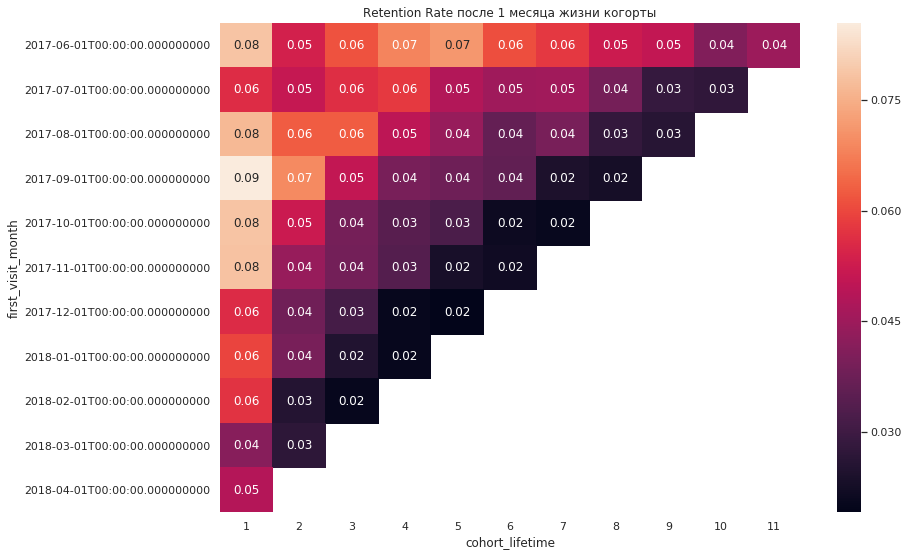

In [22]:
cohorts_1 = cohorts.query('cohort_lifetime > 0')

retention_1 = cohorts_1.pivot_table(
    index='first_visit_month', columns='cohort_lifetime', values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate после 1 месяца жизни когорты')
sns.heatmap(retention_1, annot=True, fmt='.1g')
plt.show()


### Продажи
 
 -  **Конверсия за весь период: 16%**
 - Чаще всего пользователи начинают покупать спустя **1 минуту** после первого визита
 - Покупают за месяц покупают **4346 раз**, а на одного покупателя приходится в среднем 1 покупка.
 - Средний чек за весь период **5 у.е.**; с конца 2017 на начало 2018 года средний чек снизился с 5.12 у.е. до 4.65 у.е.
   - у пользователей, остающихся в когортах на второй месяц жизни средний чек увеличивается.
 - LTV: Пользователь в среднем за жизненный цикл когорты в 6 месяцев приносит **7.6 у.е.**

In [23]:
#Оценим дополнительно конверсию
visitors = visits['uid'].nunique()
customers = orders['uid'].nunique()
print('Уникальных посетителей за весь период:', visitors)
print('Уникальных покупателей за весь период:', customers)
print('Конверсия за весь период =', round(customers / visitors * 100), '%')


Уникальных посетителей за весь период: 228169
Уникальных покупателей за весь период: 36523
Конверсия за весь период = 16 %


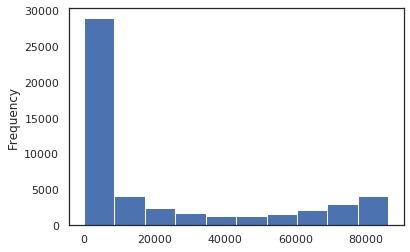

In [24]:

orders_st = orders.merge(first_visit, on='uid')
orders_st['time_to_buy'] = orders_st['buy_ts'] - orders_st['first_visit_date']
orders_st['time_to_buy'] = orders_st['time_to_buy'].dt.seconds

orders_st['time_to_buy'].plot(kind='hist')
plt.show()

In [25]:
print('Количество минут от первой активности пользователя до покупки (мода):', orders_st['time_to_buy'].mode() / 60)

Количество минут от первой активности пользователя до покупки (мода): 0    1.0
dtype: float64


In [26]:
#Сколько раз покупают за период?
orders['month'] = orders['buy_ts'].dt.month
buy_per_month = orders.pivot_table(index='month', values='uid', aggfunc='count').reset_index()
buy_per_month['uid'].median()

4533.5

In [27]:
orders['year'] = orders['buy_ts'].dt.year
orders_2017 = orders.query('year == 2017')
orders_2018 = orders.query('year == 2018')

print('В среднем покупок на одного клиента за весь период:', orders.groupby('uid')['uid'].count().median())
print('В среднем покупок на одного клиента за 2017 год:', orders_2017.groupby('uid')['uid'].count().median())
print('В среднем покупок на одного клиента за 2018 год:', orders_2018.groupby('uid')['uid'].count().median())

#display(orders.groupby('uid')['uid'].count().describe())

В среднем покупок на одного клиента за весь период: 1.0
В среднем покупок на одного клиента за 2017 год: 1.0
В среднем покупок на одного клиента за 2018 год: 1.0


In [28]:

#Формируем когорты по месяцам среди покупателей
first_order_dt = orders.groupby('uid')['buy_ts'].min()
first_order_dt.name = 'first_order_dt'
orders_cohorts = orders.merge(first_order_dt, on='uid')
orders_cohorts['first_order_month'] = orders_cohorts['first_order_dt'].astype('datetime64[M]')
orders_cohorts['order_month'] = orders_cohorts['buy_ts'].astype('datetime64[M]')

#возраст когорт
orders_cohorts['age'] = (orders_cohorts['order_month'] - orders_cohorts['first_order_month']) / np.timedelta64(1, 'M')
orders_cohorts['age'] = orders_cohorts['age'].round().astype('int')
#orders_cohorts.head()




In [30]:
print('Средний чек за весь период:', orders['revenue'].mean().round(2))

print('Средний чек за конец 2017 года:',orders_2017['revenue'].mean().round(2))
print('Средний чек за начало 2018 года:', orders_2018['revenue'].mean().round(2))
print(orders_2018['revenue'].mean().dtype)


Средний чек за весь период: 5.0
Средний чек за конец 2017 года: 5.12
Средний чек за начало 2018 года: 4.85
float64


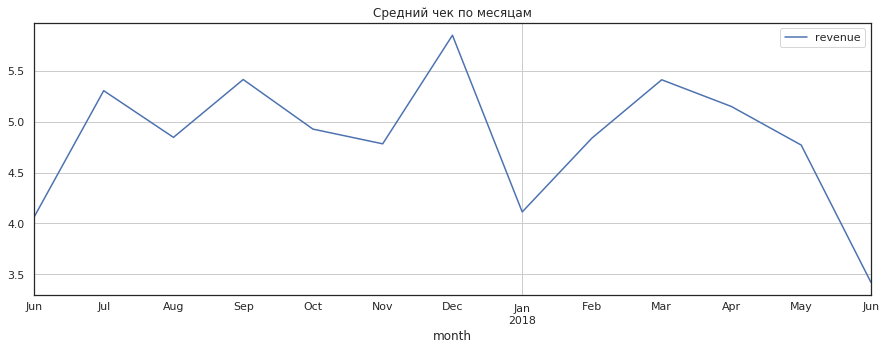

In [31]:

orders['month'] = orders['buy_ts'].astype('datetime64[M]')

orders.pivot_table(
    index='month', values='revenue').plot(figsize=(15,5), grid = True)
plt.title('Средний чек по месяцам')
plt.show()

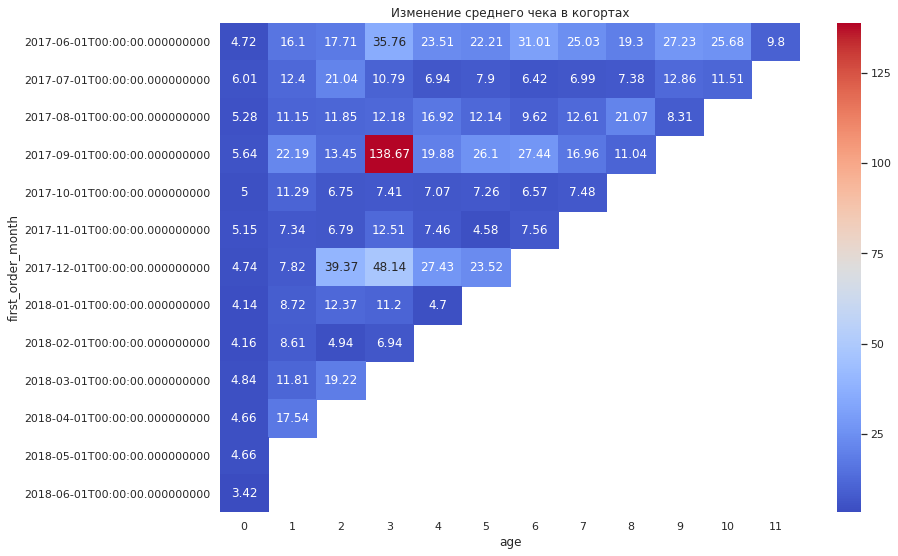

In [32]:
#Посмотрим изменение среднего чека по когортам
revenue_cohorts = orders_cohorts.groupby(['first_order_month','age']).agg({'revenue':'sum','uid':'nunique'})
revenue_cohorts

revenue_cohorts['revenue_per_user'] = revenue_cohorts['revenue'] / revenue_cohorts['uid']
revenue = revenue_cohorts.pivot_table(index='first_order_month',
                            columns='age',
                            values='revenue_per_user',
                            aggfunc='mean').round(2)


plt.figure(figsize=(13, 9))
plt.title('Изменение среднего чека в когортах')
sns.heatmap(revenue, annot=True, fmt='1g',cmap= 'coolwarm');


### Затраты на маркетинг

 - Сколько денег потратили? Всего / на каждый источник / по времени
 - За весь период потратили **329131 у.е.**. 
 
 **Затраты на маркетинг по времени**
 
  - растут с августа по ноябрь 2017 года
  - снижаются в январе, но увеличиваются в феврале на уровень, близкий к декабрьскому
  - резко идут на спад к маю
 
 Если оценить при этом динамику среднего чека по месяцам, то увидим схожую тенденцию:
 
 - с флуктуациями, но чек растет к декабрю.
 - уходит в негативный пик в январе, но к февралю растет.
 - после начинает резское снижение к маю.
 
 Важно учитывать эти 4 этапа при оценке динамики когорт.
 
 
   - август-ноябрь/декабрь - рост
   - январь - негативный пик 
   - февраль - подъем на уровень близкий к осенним показателям
   - март - май - снижение
   
   
 **Количество покупателей, пришедших из различных ичточников:**
 
 - 4 - 10648
 - 5 -	9115
 - 3 -	8062
 - 9 -	2710
 - 2 -	2488
 - 10 - 1773
 - 1 -	1726

 
 - Из источника 7 пришел только один покупатель, а денег на этот источник не было потрачено, поэтому этот источник мы считаем аномальным и требующим дополнительного изучения.
 
  **Затраты на маркетинг по источникам**
 
 - Больше всего маркетинговых затрат пришлось на источники
   - 3 (141321 у.е)
   - 4 (61073 у.е)
   - 5 (51757 у.е)
   
 - Меньше всего затрат было на источники
   - 9 (5517 у.е)
   - 10 (5822 у.е)
   - 1 (20833.27 у.е.)
 
Окупаемость когорт в этих источниках, как своего рода полюсные значения, будет интересно посмотреть в первую очередь.

 **Строимость привлечения одного покупателя из источника**
 
 - 10 - 30.29
 - 1 -	28.42
 - 2 -	20.50
 - 9 -	16.74
 - 3 -	6.18
 - 5 -	5.08
 - 4 -	4.92



 - Из 10 и 1 источника пришло меньше всего людей, а на 10 источник было потрачена одна из наименьших сумм 
 - На источники 4, 5 и 3 было потрачено больше всего денег, пришло наибольшее количество покупателей и закономерно в них наименьшая стоимость одного покупателя.
 
 **Окупаемость источников**
 
 
 - "Успешные" источники:
   - 3: LTV (5.45) < CAC (6.18)
   - 4: LTV (5.73) > CAC (4.92)
   - 5: LTV (12.7) > CAC (5.08)
   
Когорты в этих источниках окупаются. Наибольшая выручка приходит из когорт 5 источника, так как выручка с клиента там получается в два раза больше, чем затраты на маркетинг.
   
   
 - "Неуспешные" источники
   - 1: LTV (4.99) < CAC (28.42)
   - 10: LTV (4.84) < CAC (30.29)
   
Когорты этих источников не окупаются за свой срок жизни, при этом они часто бывают неактивны.


Потрачено на маркетинг за весь период: 329131.62


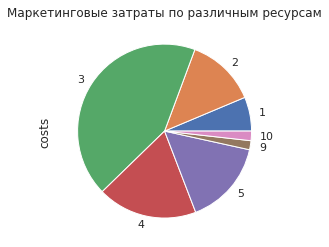

In [33]:
#изначальный датасет для сверки
#display(costs.head())

print('Потрачено на маркетинг за весь период:', costs['costs'].sum())
marketing_by_source = costs.pivot_table(
    index='source_id', values='costs', aggfunc='sum')
marketing_by_source['costs'].plot(kind='pie')
plt.title('Маркетинговые затраты по различным ресурсам')
plt.show()

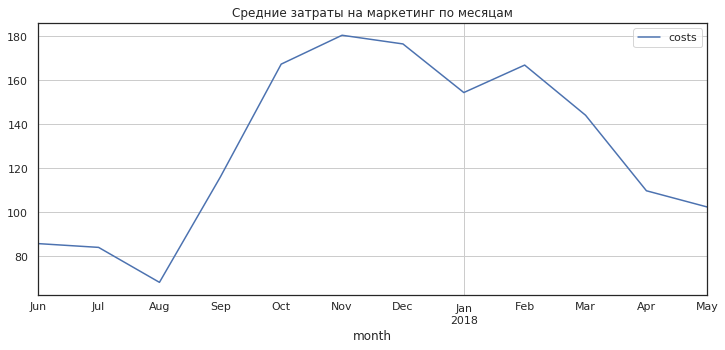

In [34]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs_per_month = costs.pivot_table(
    index='month', values='costs')

costs_per_month.plot(figsize=(12,5), grid = True)
plt.title('Средние затраты на маркетинг по месяцам')
plt.show()

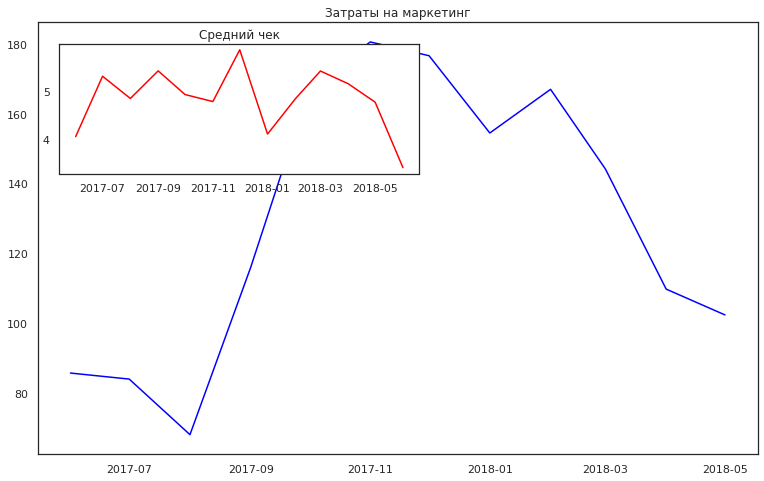

In [35]:
revenue_per_month = orders.pivot_table(
    index='month', values='revenue')

fig = plt.figure(figsize = (10, 6))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.03, 0.65, 0.5, 0.3])

ax1.set_title('Затраты на маркетинг')
ax2.set_title('Средний чек')

ax1.plot(costs_per_month, color='blue')
ax2.plot(revenue_per_month, color='red')
plt.show()

In [36]:
#детализация расходов на маркетинг по источникам и времени в цифрах

#display(marketing_by_source.sort_values('costs', ascending=False))
#display(costs_per_month.sort_values('costs', ascending=False))

print('Затраты маркетинга на каждый источник')
display(marketing_by_source.pivot_table(index='source_id', values='costs', aggfunc = 'sum').sort_values('costs', ascending=False))

print('Средние затраты на маркетинг по месяцам')
display(costs_per_month.pivot_table(index='month', values='costs').sort_values('costs', ascending=False))


Затраты маркетинга на каждый источник


,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


Средние затраты на маркетинг по месяцам


,costs
month,
2017-11-01,180.513714
2017-12-01,176.568433
2017-10-01,167.386544
2018-02-01,166.954235
2018-01-01,154.463226
2018-03-01,144.148199
2017-09-01,116.042429
2018-04-01,109.799901
2018-05-01,102.415991


# Расчет LTV, CAC, ROI

 - LTV
 - Сколько стоило привлечение одного покупателя из каждого источника? (CAC)
 - На сколько окупились расходы? (ROI)
 

## LTV по когортам

1. Расчитать ltv по когортам
На тепловой карте не коммулятивный показатель, а прибыль с каждого покупателя из определенной когорты. После месяца первой покупки сильно падает. Есть небольшие флуктуации, но незначительные.

2. Расчитать средний коммулятивный ltv для участников когорт, проживших 6 месяцев.
Расчитаем взвешенное среднее. Просуммируем комулятивную выручку к 6 месяцу жизни когорт и разделим на количество участников этих когорт.
Получается, что на 6 месяц жизни когорты пользователь приносит **7.7 у.е.** выручки.



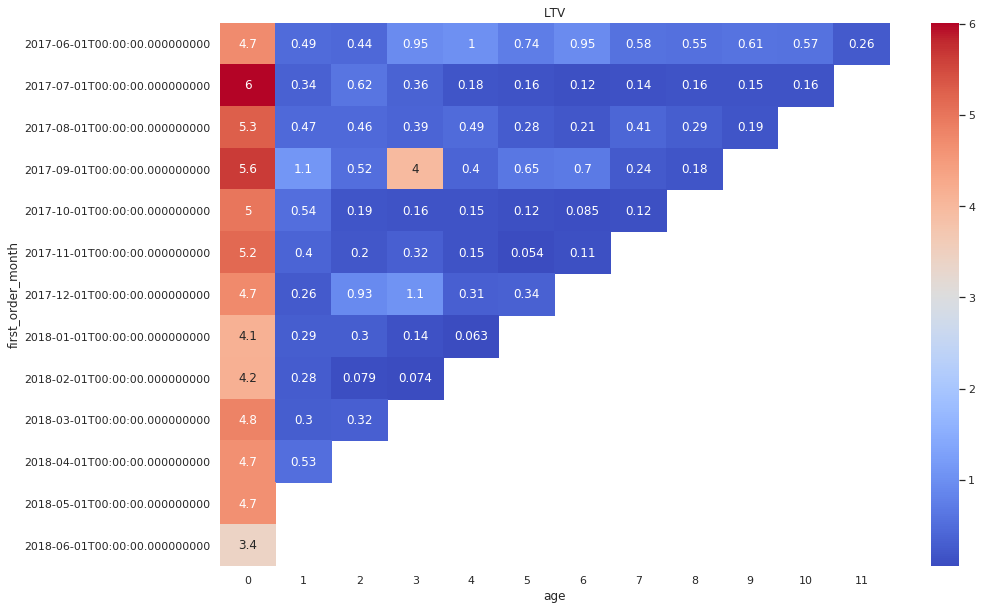

In [37]:
#LTV
#месяц заказа и месяц расходов
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

#месяц первой покупки

first_orders = orders.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#first_orders.head()

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
#cohort_sizes.head()

orders_new = pd.merge(orders,first_orders, on='uid')
#orders_new.head()

#Когорты и выручка каждой когорты
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
#cohorts.head()

#добавим количество людей в когорте, совершивших покупку, что бы считать ltv
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
#report.head()

margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

#report

output_ltv = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')

plt.figure(figsize=(15, 10))
plt.title('LTV')
sns.heatmap(output_ltv, annot=True, fmt='0.2g',cmap= 'coolwarm')
plt.show()


In [38]:
#взвешенное среднее LTV для когорт со сроком жизни 6 месяцев
#кумулятивная выручка для когорт
report["gp"] = report.sort_values(["age"]).groupby("first_order_month")["gp"].cumsum()

#выбираю когорты, дожившие до 6 месяца, где в колонке gp накопительная сумма выручки
report_1 = report[report['age'] == 5]
avg_ltv = report_1['gp'].sum() / report_1['n_buyers'].sum() #делю на суммарное количество людей в этих когортах
print(round(avg_ltv,2))
report_1.head()


7.7


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
5,2017-06-01,2023,2017-11-01,1487.92,16912.45,5,0.735502
17,2017-07-01,1923,2017-12-01,300.08,14731.67,5,0.156048
28,2017-08-01,1370,2018-01-01,388.45,10104.93,5,0.283540
38,2017-09-01,2581,2018-02-01,1670.08,31762.98,5,0.647067
47,2017-10-01,4340,2018-03-01,522.37,26734.21,5,0.120362


## Общий ROMI по когортам

Сразу добавим CAC по когортам и оценим окупаемость когорт.
 - Окупиться смогли только 2 когорты: июньская и сентябрьская. Сентябрьская когорта, к тому же, окупилась очень быстро, на 4 месяц жизни
   - В декабре для сентябрьской когорты так же самый большой средний чек, более чем в 5 раз превышающий таковой для других когорт. Возможно, в этот месяц была аномально большая закупка.
 - В среднем же когорты приближаются к окупаемости на 7 месяц жизни, но существуют еще недостаточно долго, что бы окупиться. 
 - Так как из предыдущих данных видно, что июньская когорта просуществовала дольше остальных и в ней с наименьшей скоростью падал RR, то возможно сделать вывод, что срок окупаемости последующих когорт более 12 месяцев.
 - Чем ниже будет падать RR, тем больше времени потребуется когорте, что бы окупаться.
 
 
 - В среднем когорты окупаются на 10-11 месяц.
   

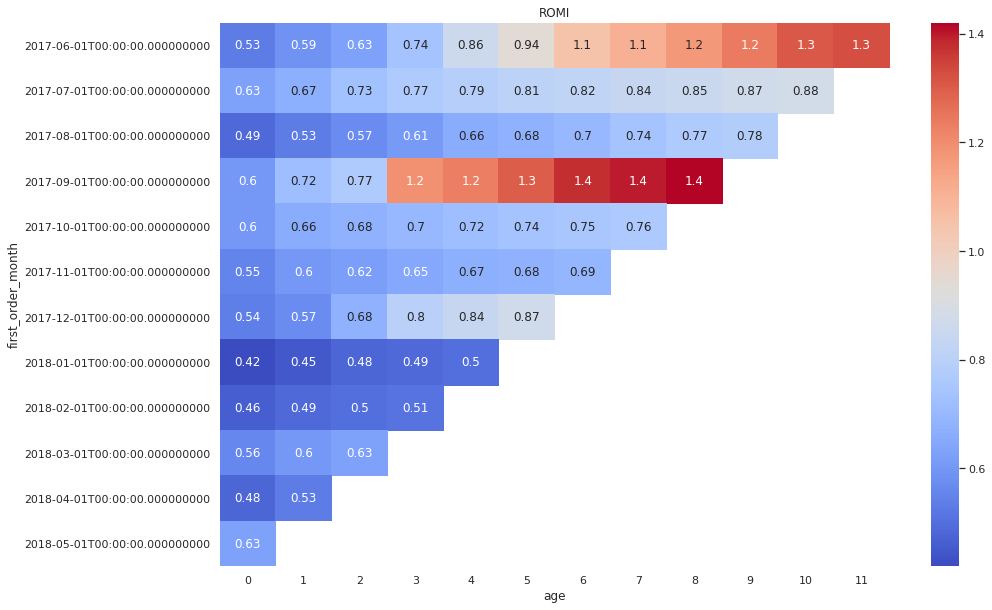

In [39]:
monthly_costs = costs.groupby('month').agg({'costs':'sum'})
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)

plt.figure(figsize=(15, 10))
plt.title('ROMI')
sns.heatmap(output, annot=True, fmt='0.2g',cmap= 'coolwarm')
plt.show()


In [66]:
# усредненный ROMI
output.mean(axis=0)

age
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

## Оценка LTV, CAC и ROMI по источникам трафика.


In [40]:
#для подготовки датасета нужны покупатели и источники, которые возьмем из визитов
df_orders = pd.read_csv('/datasets/orders_log.csv')
df_visits = pd.read_csv('/datasets/visits_log.csv')

#выделим из визитов только пользователй и источник
df_visits = df_visits[['Uid', 'Source Id']]
df_visits.columns = ['uid', 'source_id']
df_visits = df_visits.groupby(["uid"]).agg({"source_id": max}).reset_index()

#сольем заказы с источниками
df_orders.columns = ['buy_ts', 'revenue', 'uid']
df_orders = df_orders.merge(df_visits, on=['uid'], how='left')

#Выделим месяц заказа и месяц первого заказа
df_orders['order_month'] = pd.to_datetime(df_orders['buy_ts']).astype('datetime64[M]')
del df_orders['buy_ts']

first_order_month = df_orders.groupby(
    ['uid']).agg({'order_month':'min'}).rename(columns={'order_month':'first_order_month'}).reset_index()

df_orders = df_orders.merge(first_order_month, on='uid')
del first_order_month

#Посчитаем количество уникальных покупателей по когортам и выручку
uid_count = df_orders.groupby(["source_id", "first_order_month"]).agg({"uid":'nunique'}).reset_index()
df_orders = df_orders.groupby(["source_id", "first_order_month", "order_month"]).agg({"revenue": sum}).reset_index()

#добавим жизненный цикл когорты
df_orders['lt'] = (df_orders['order_month'] - df_orders['first_order_month']) / np.timedelta64(1, 'M')
df_orders["lt"] = round(df_orders["lt"]).astype(int)

del df_orders["order_month"] #По большому счету месяц заказа больше не нужен

#добавим максимальный срок жизни когорты
max_lt = df_orders.groupby(["source_id", "first_order_month"]).agg({"lt": max}).rename(columns={"lt": "lt_max"})

df_orders.head(10)

,source_id,first_order_month,revenue,lt
0,1,2017-06-01,501.92,0
1,1,2017-06-01,1.10,1
2,1,2017-06-01,1.04,5
3,1,2017-06-01,0.49,7
4,1,2017-07-01,620.11,0
5,1,2017-07-01,2.44,1
6,1,2017-07-01,5.00,7
7,1,2017-08-01,265.55,0
8,1,2017-08-01,0.92,1
9,1,2017-08-01,10.08,3


In [41]:
#Так как участники когорты покупали не каждый месяц, то пропуски заполним нулями, что бы сохренить порядок сроков жизни
df_orders_1 = df_orders.set_index(["source_id", "first_order_month", "lt"]).unstack().fillna(0).stack().reset_index()

df_orders_1.head(10)

,source_id,first_order_month,lt,revenue
0,1,2017-06-01,0,501.92
1,1,2017-06-01,1,1.10
2,1,2017-06-01,2,0.00
3,1,2017-06-01,3,0.00
4,1,2017-06-01,4,0.00
5,1,2017-06-01,5,1.04
6,1,2017-06-01,6,0.00
7,1,2017-06-01,7,0.49
8,1,2017-06-01,8,0.00
9,1,2017-06-01,9,0.00


In [42]:
df_orders_1 = df_orders_1.merge(uid_count, on=["source_id", "first_order_month"])

df_orders_1 = df_orders_1.merge(max_lt, on=["source_id", "first_order_month"], how="left")

#Добавляем накопительную выручку для расчета среднего ЛТВ
df_orders_1["cum_revenue"] = df_orders_1.sort_values(["lt"]).groupby(["source_id", "first_order_month"])["revenue"].cumsum()

df_orders_1.head()

,source_id,first_order_month,lt,revenue,uid,lt_max,cum_revenue
0,1,2017-06-01,0,501.92,99,7,501.92
1,1,2017-06-01,1,1.10,99,7,503.02
2,1,2017-06-01,2,0.00,99,7,503.02
3,1,2017-06-01,3,0.00,99,7,503.02
4,1,2017-06-01,4,0.00,99,7,503.02


In [49]:
#составим функцию для подсчета взвешанного среднего ЛТВ по источникам
def ltv_source(i):
    df = df_orders_1[df_orders_1['source_id'] == i]
    
    df = df[df["lt"] <= df["lt_max"]]
    df = df[df["lt_max"] >= 5]
    
    margin = 1
    df["gp"] = df["cum_revenue"] * margin
    df = df[df["lt"] == 5]
    ltv = df["gp"].sum() / df["uid"].sum()
    print(round(ltv, 2))
    


In [44]:
#Получим ЛТВ для всех источников (кроме 7, он аномальный)
print('Источник 1')
ltv_source(1)
print('Источник 2')
ltv_source(2)
print('Источник 3')
ltv_source(3)
print('Источник 4')
ltv_source(4)
print('Источник 5')
ltv_source(5)
print('Источник 6')
ltv_source(6)
print('Источник 8')
ltv_source(8)
print('Источник 9')
ltv_source(9)
print('Источник 10')
ltv_source(10)


Источник 1
4.99
Источник 2
8.87
Источник 3
5.45
Источник 4
5.73
Источник 5
12.7
Источник 6
nan
Источник 8
nan
Источник 9
6.84
Источник 10
4.84


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [45]:
df_orders = df_orders.merge(uid_count, on=["source_id", "first_order_month"])

df_orders = df_orders.merge(max_lt, on=["source_id", "first_order_month"], how="left")

#Добавляем накопительную выручку для расчета среднего ЛТВ
df_orders["cum_revenue"] = df_orders.sort_values(["lt"]).groupby(["source_id", "first_order_month"])["revenue"].cumsum()

df_orders.head()

,source_id,first_order_month,revenue,lt,uid,lt_max,cum_revenue
0,1,2017-06-01,501.92,0,99,7,501.92
1,1,2017-06-01,1.10,1,99,7,503.02
2,1,2017-06-01,1.04,5,99,7,504.06
3,1,2017-06-01,0.49,7,99,7,504.55
4,1,2017-07-01,620.11,0,95,7,620.11


In [46]:
#затраты на маркетинг на каждый источник по каждому месяцу

costs_source = costs.groupby(['month', 'source_id']).agg({'costs':'sum'})


df_report = pd.merge(df_orders, costs_source, left_on='first_order_month', right_on='month')

#Добавим в общий расчет cac, gp, ltv и romi
df_report['cac'] = df_report['costs'] / df_report['uid']
#df_report[df_report['lt'] == 4] проверка

margin_rate = 1
df_report['gp'] = df_report['revenue'] * margin_rate
df_report['ltv'] = df_report['gp'] / df_report['uid']

df_report['romi'] = df_report['ltv'] / df_report['cac']

df_report.head(10)

,source_id,first_order_month,revenue,lt,uid,lt_max,cum_revenue,costs,cac,gp,ltv,romi
0,1,2017-06-01,501.92,0,99,7,501.92,1125.61,11.369798,501.92,5.069899,0.445909
1,1,2017-06-01,501.92,0,99,7,501.92,2427.38,24.518990,501.92,5.069899,0.206774
2,1,2017-06-01,501.92,0,99,7,501.92,7731.65,78.097475,501.92,5.069899,0.064918
3,1,2017-06-01,501.92,0,99,7,501.92,3514.80,35.503030,501.92,5.069899,0.142802
4,1,2017-06-01,501.92,0,99,7,501.92,2616.12,26.425455,501.92,5.069899,0.191857
5,1,2017-06-01,501.92,0,99,7,501.92,285.22,2.881010,501.92,5.069899,1.759764
6,1,2017-06-01,501.92,0,99,7,501.92,314.22,3.173939,501.92,5.069899,1.597352
7,1,2017-06-01,1.10,1,99,7,503.02,1125.61,11.369798,1.10,0.011111,0.000977
8,1,2017-06-01,1.10,1,99,7,503.02,2427.38,24.518990,1.10,0.011111,0.000453
9,1,2017-06-01,1.10,1,99,7,503.02,7731.65,78.097475,1.10,0.011111,0.000142


In [47]:
#В среднем затраты маркетинга на одного покупателя из каждого источника за весь период:
display(df_report.groupby('source_id').agg({'cac':'mean'}).sort_values('cac', ascending = False).round(2))

#Количество покупателей в каждом источнике
display(uid_count.groupby('source_id').agg({'uid':'sum'}).sort_values('uid', ascending = False))

,cac
source_id,
7,2112.93
10,30.29
1,28.42
2,20.50
9,16.74
3,6.18
5,5.08
4,4.92


,uid
source_id,
4,10648
5,9115
3,8062
9,2710
2,2488
10,1773
1,1726
7,1


In [62]:
def romi_source(i):
    df = df_report[df_report['source_id'] == i]
    romi_p = df.pivot_table(
        index='first_order_month', 
        columns='lt', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)
    romi_p
    
    plt.figure(figsize=(15, 10))
    plt.title(i)
    sns.heatmap(romi_p, annot=True, fmt='0.2g',cmap= 'coolwarm')
    plt.show()
    
    

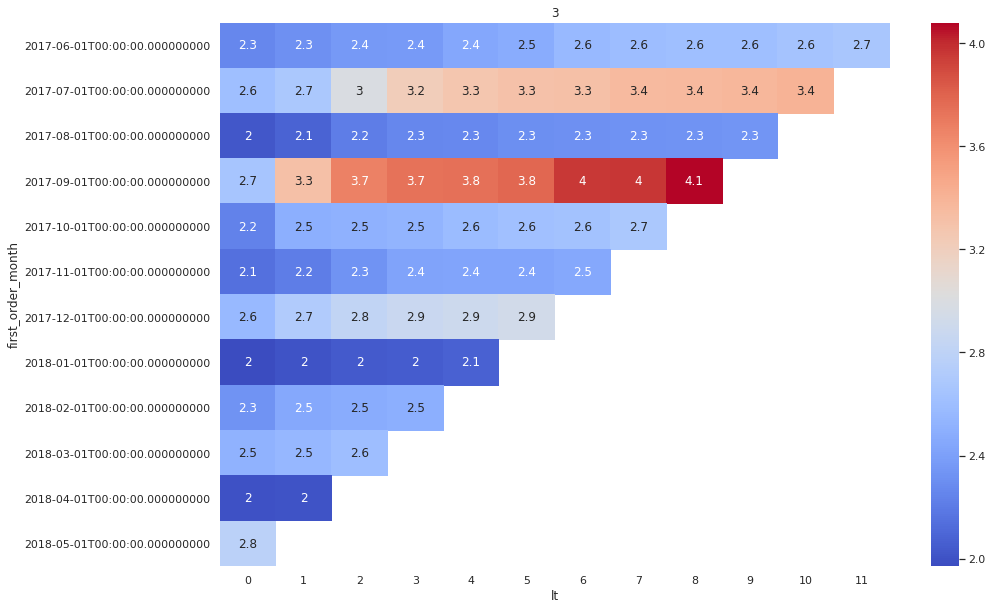

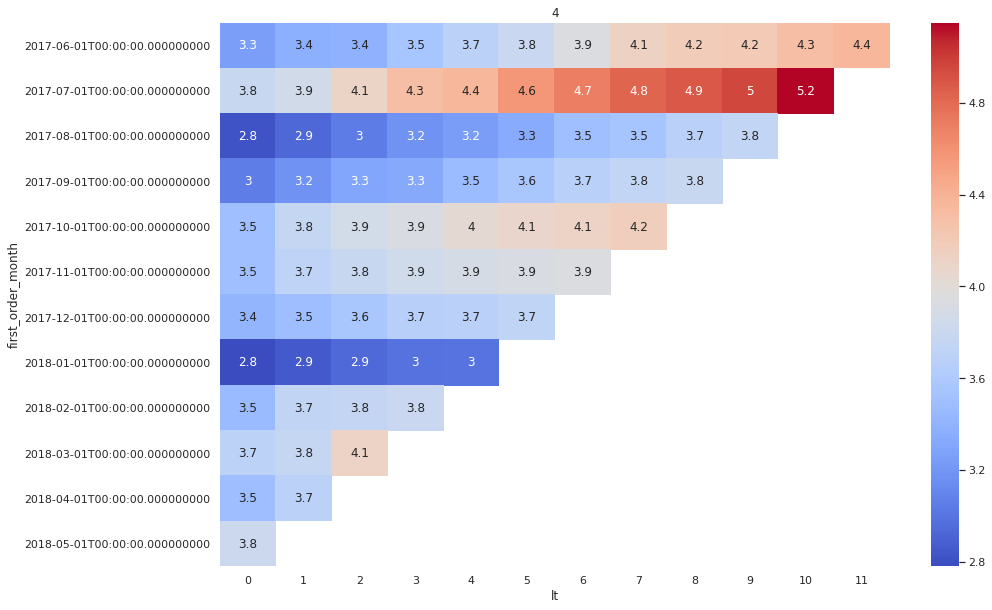

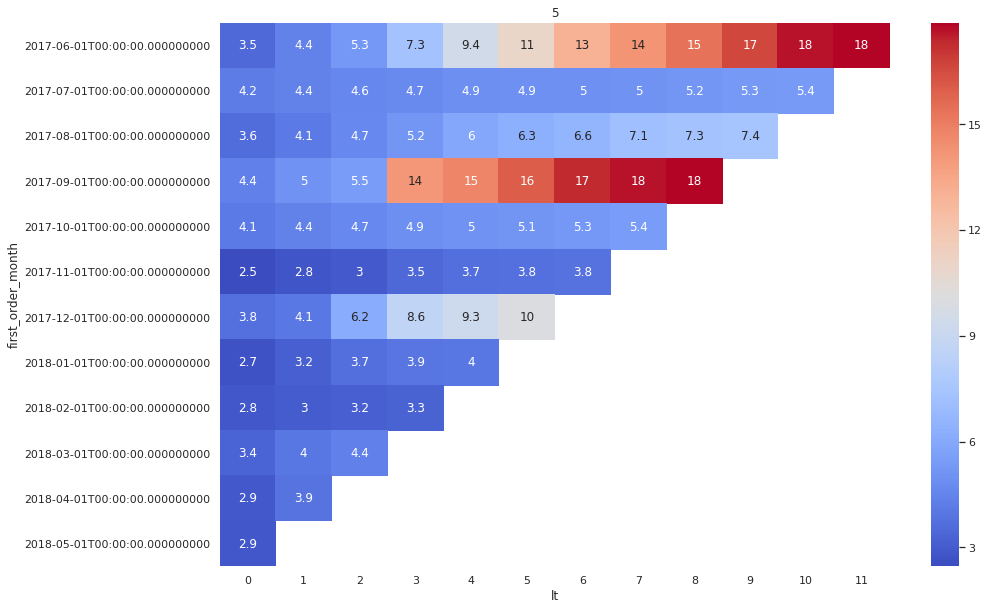

In [61]:
romi_source(3)
romi_source(4)
romi_source(5)

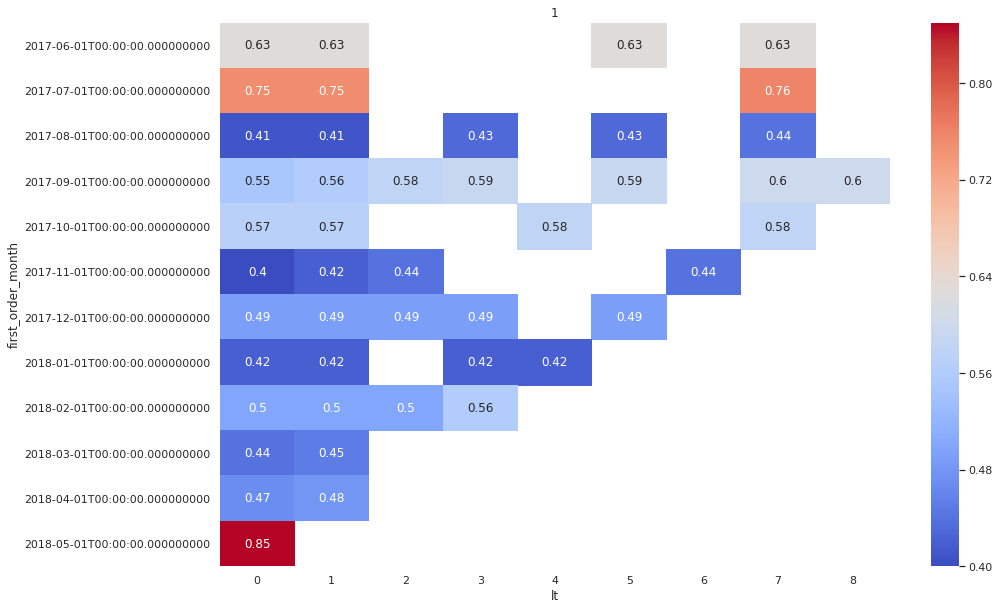

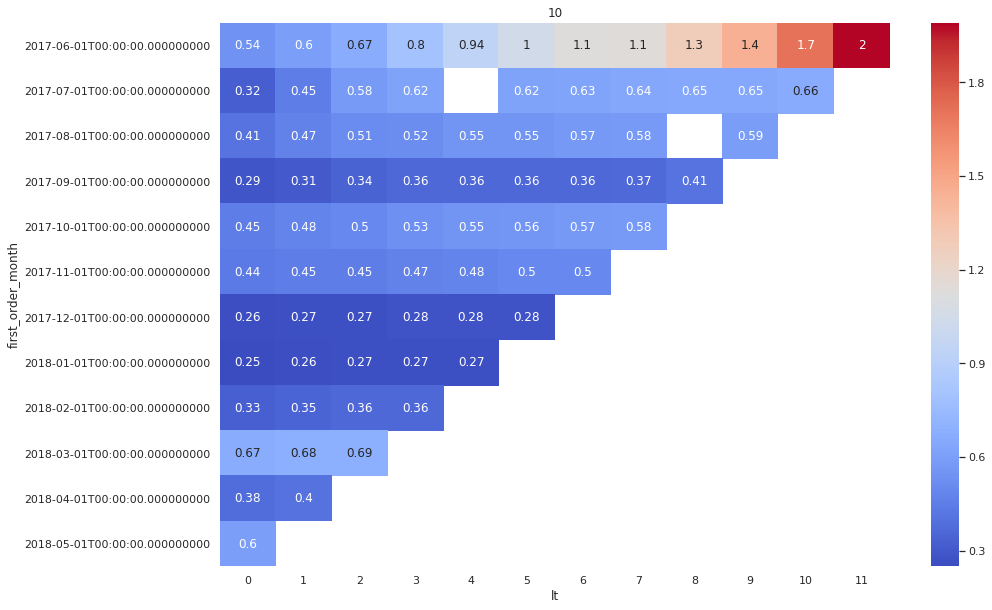

In [63]:
romi_source(1)
romi_source(10)

# Вывод

 1. С ростом расходов на маркетинг увеличивается средний чек.
 2. У сервиса очень низкий показатель повторного использования и высокий отток пользователей.
 3. Сервисом чаще пользуются с домашних компьютеров. Необходимо проверить работу мобильной версии сервиса.
 4. Когорты окупаются на 10-11 месяц. Это очень большой срок. Так как пользователи быстро уходят, то 3 месяцу остается 10-15% пользователей когорты.
 5. Необходимо работать над повышением RR и sticky_factor сервиса. Чем больше будет размер когорт, тем быстрее они смогут окупиться.
 

 - Наиболее прибыльными и окупающимися являются источники трафика 4 и 5. На эти источники были выделены наибольшие маркетинговые бюджеты и из них пришло нибольшее количество человек.
 - Наименее прибыльными оказались источники 1 и 10, где затраты были небольшими, но не окупившими себя. 
 - Источник 3 приближается по значениям к 4 и 5, но не окупается полностью. 
 
 Решение: сократить источники 1 и 10, перераспределить бюджеты на источник 3 и повышение разработку способов повышения RR сервиса.
 